In [1]:
workdir = "/SNS/users/lj7/dv/sns-chops/detcalib/ARCS/out/"
%cd {workdir}

/SNS/users/lj7/dv/sns-chops/detcalib/ARCS/out


In [12]:
import sys, os, numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [3]:
sys.path.insert(0, "/SNS/users/lj7/dv/sns-chops/detcalib/ARCS/lib/")

In [4]:
#sys.path

In [5]:
import get_I_tof
reload(get_I_tof)

<module 'get_I_tof' from '/SNS/users/lj7/dv/sns-chops/detcalib/ARCS/lib/get_I_tof.pyc'>

In [6]:
import get_difc_from_Itof
reload(get_difc_from_Itof)

<module 'get_difc_from_Itof' from '/SNS/users/lj7/dv/sns-chops/detcalib/ARCS/lib/get_difc_from_Itof.pyc'>

In [7]:
import align
reload(align)
import align_utils
reload(align_utils)

<module 'align_utils' from '/SNS/users/lj7/dv/sns-chops/detcalib/ARCS/lib/align_utils.pyc'>

In [8]:
pack = 'B10/eightpack'
packname, packtype = pack.split('/')

# Diamond

In [ ]:
# np.load('./diamond-I_tof/I_tof-xbb.npy')

In [9]:
ls diamond-I_tof/*{packname}*

diamond-I_tof/difc-B10.npy     diamond-I_tof/mask-B10.npy
diamond-I_tof/I_tof-y-B10.npy  diamond-I_tof/pack-B10.yaml


In [10]:
cat diamond-I_tof/pack-{packname}.yaml

pixelIDs:
  first: 9216
  last: 10239


<IPython.core.display.Javascript object>


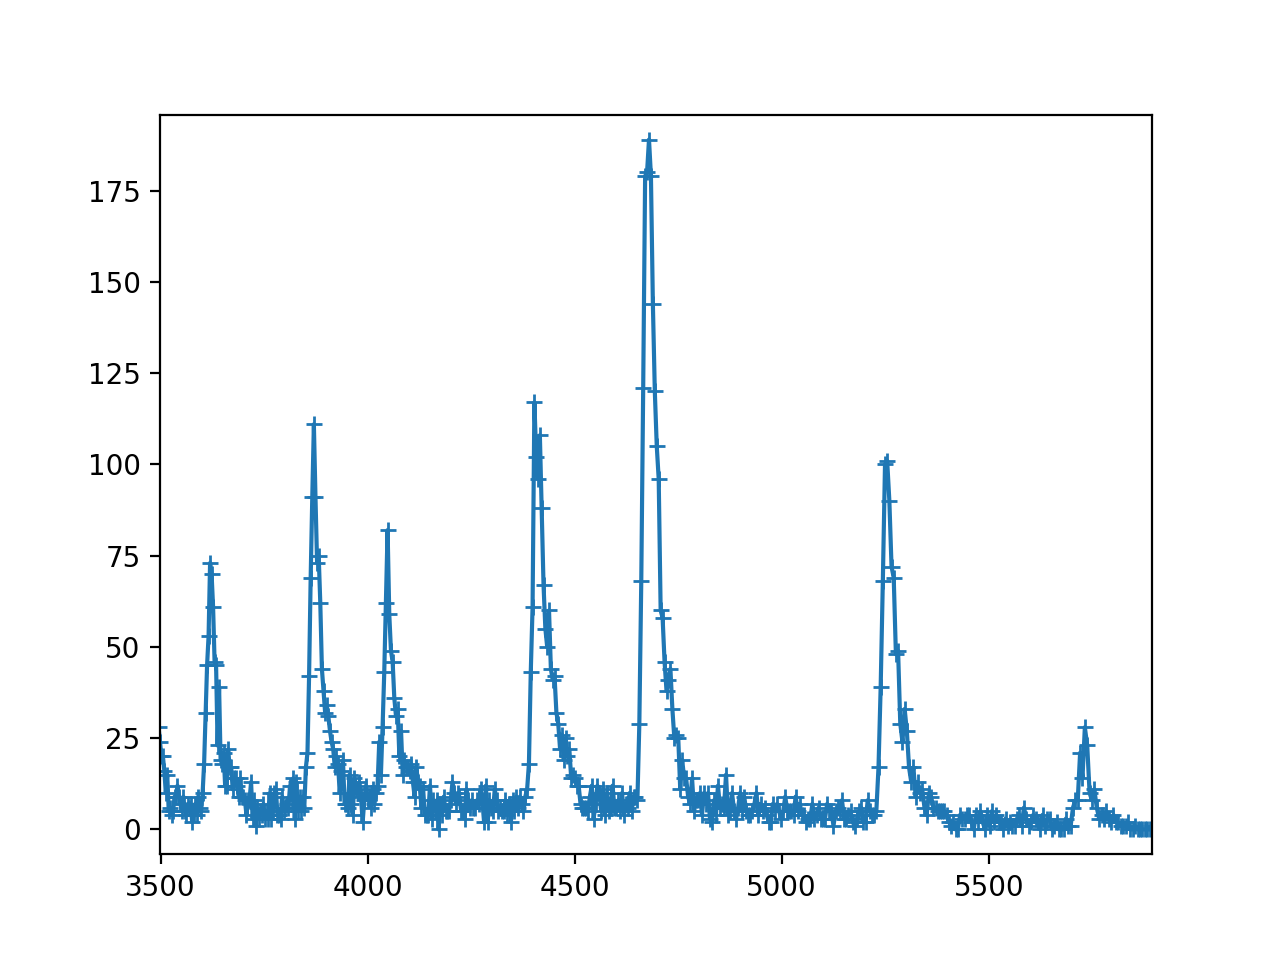

In [13]:
xbb = np.load('diamond-I_tof/I_tof-xbb.npy')
x = (xbb[:-1] + xbb[1:])/2
ypack = np.load('diamond-I_tof/I_tof-y-%s.npy' % packname)
plt.figure()
plt.plot(x, ypack[60], '-+')

## Obtain difc

In [14]:
fitter = get_difc_from_Itof.Fitter(
    peak_fractional_width=0.05, bg_type='linear', curve_fit_options=dict(maxfev=1000), t0_range=(0, 100))
dvalues = [
    0.63053242,  0.68643675,  0.72807612,  0.81828692,  0.8917075 ,
    #1.02965513,  
    1.0754397 ,  1.26106484,  2.05931026]
dmin=.6215; dmax=2.5

In [15]:
I_tof_dir = 'diamond-I_tof'

gpd = get_difc_from_Itof.GetPackDifc(
    pack=packname,
    dvalues=dvalues,
    dmin=dmin, dmax=dmax,
    I_tof_dir = I_tof_dir,
    fitter=fitter,
    maxchisq = 100.,
    min_counts = 5000)

* tof range: 2083.33333333 8333.33333333


In [16]:
fitres = gpd.fitOnePixel(30)
print fitres.chisq
print fitres.difc, fitres.nominal_difc, fitres.t0
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(fitres.plotdata.x,fitres.plotdata.y, '+')
plt.plot(fitres.plotdata.fitx, fitres.plotdata.fity)
plt.subplot(1,2,2)
plt.plot(fitres.plotdata.d, fitres.plotdata.fity)

* Not enough counts: 30


AttributeError: 'NoneType' object has no attribute 'chisq'

2.21974807306
6399.72918906 6401.93270966 22.7200621225


<IPython.core.display.Javascript object>


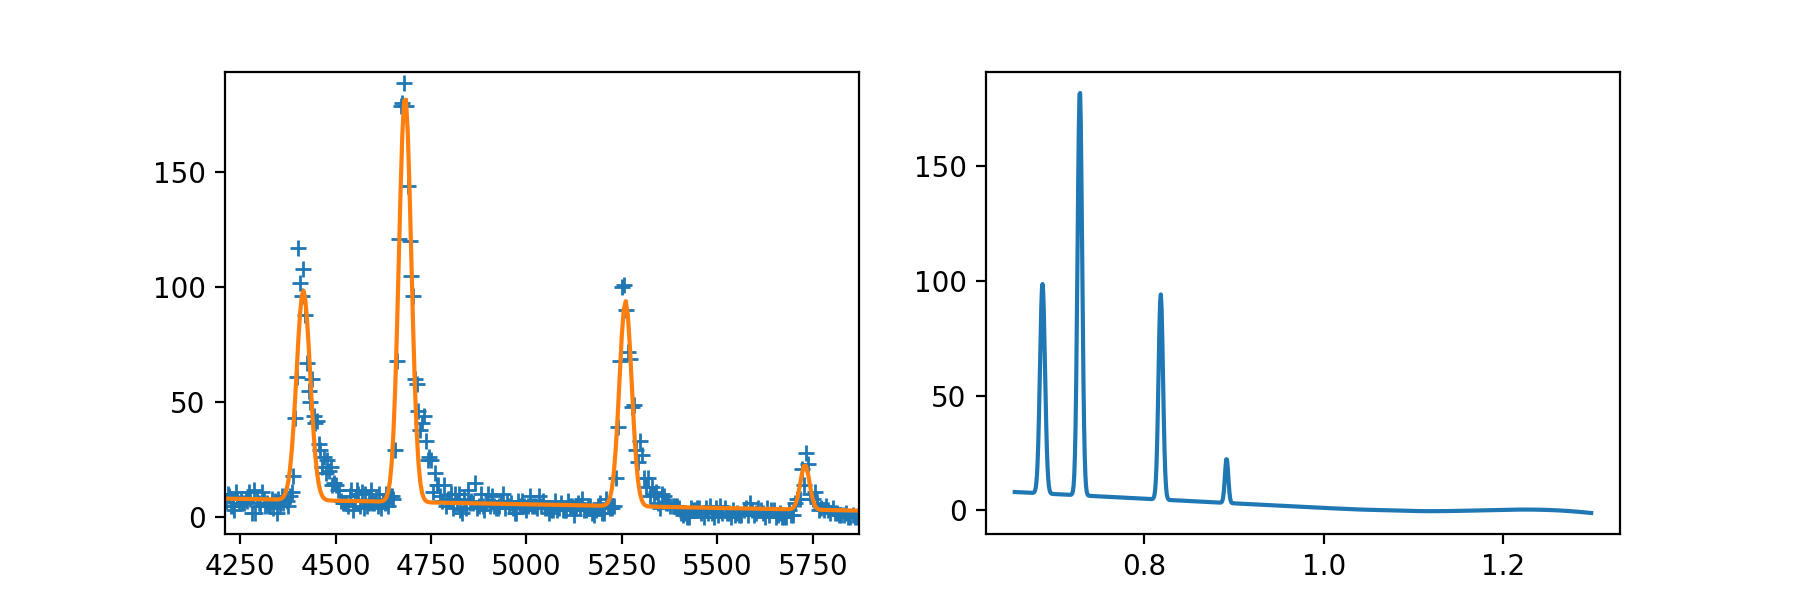

In [17]:
fitres = gpd.fitOnePixel(60)
print fitres.chisq
print fitres.difc, fitres.nominal_difc, fitres.t0
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(fitres.plotdata.x,fitres.plotdata.y, '+')
plt.plot(fitres.plotdata.fitx, fitres.plotdata.fity)
plt.subplot(1,2,2)
plt.plot(fitres.plotdata.d, fitres.plotdata.fity)

%%time
fitres = gpd.fitOnePixel(120)
print fitres.chisq
print fitres.difc, fitres.nominal_difc, fitres.t0
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(fitres.plotdata.x,fitres.plotdata.y, '+')
plt.plot(fitres.plotdata.fitx, fitres.plotdata.fity)
plt.subplot(1,2,2)
plt.plot(fitres.plotdata.d, fitres.plotdata.fity)

%%time
fitres = gpd.fitOnePixel(30+1*128)
print fitres.chisq
print fitres.difc, fitres.nominal_difc, fitres.t0
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(fitres.plotdata.x,fitres.plotdata.y, '+')
plt.plot(fitres.plotdata.fitx, fitres.plotdata.fity)
plt.subplot(1,2,2)
plt.plot(fitres.plotdata.d, fitres.plotdata.fity)

%%time
fitres = gpd.fitOnePixel(30+7*128)
print fitres.chisq
print fitres.difc, fitres.nominal_difc, fitres.t0
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(fitres.plotdata.x,fitres.plotdata.y, '+')
plt.plot(fitres.plotdata.fitx, fitres.plotdata.fity)
plt.subplot(1,2,2)
plt.plot(fitres.plotdata.d, fitres.plotdata.fity)

3.47842952178
6217.3324554 6195.2860886 3.99710450341


<IPython.core.display.Javascript object>


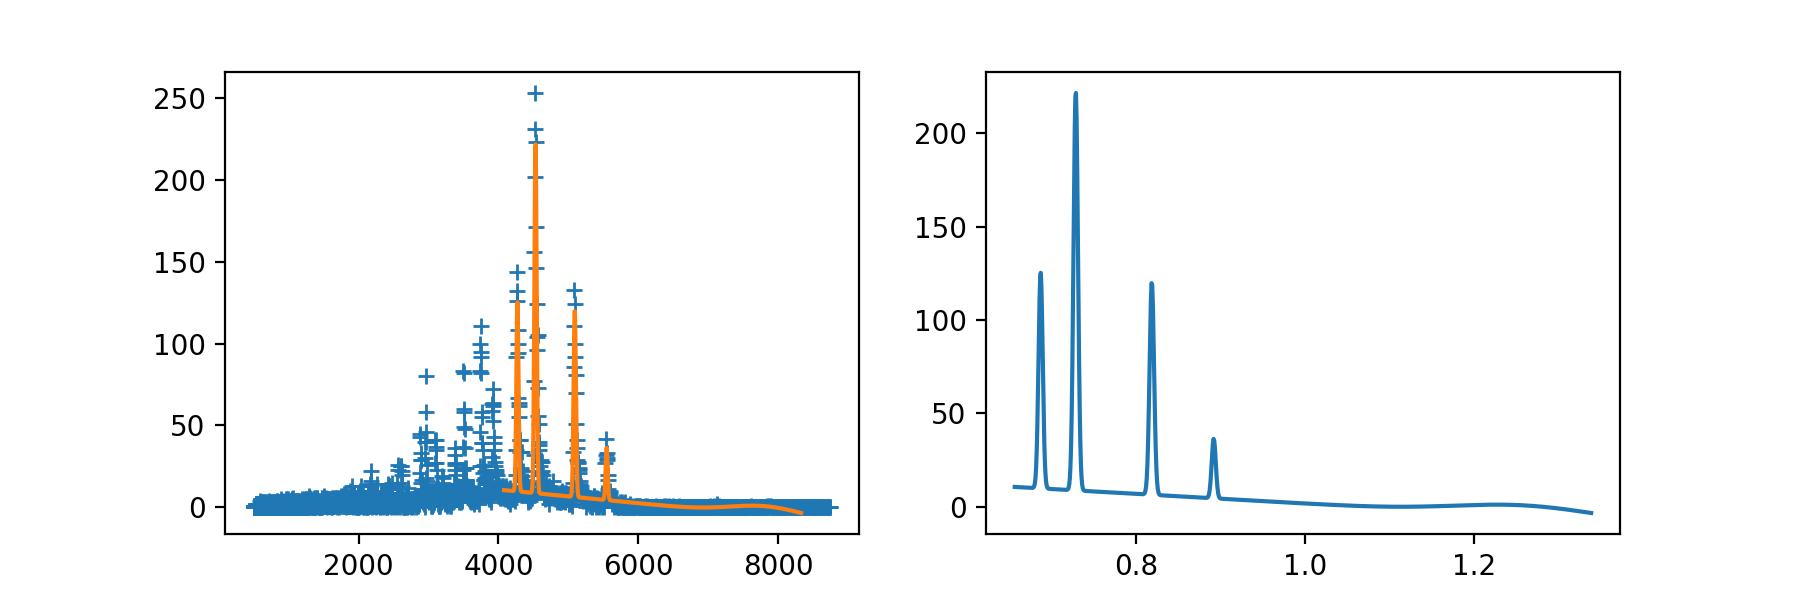

CPU times: user 2.36 s, sys: 8.45 s, total: 10.8 s
Wall time: 407 ms


In [18]:
%%time
fitres = gpd.fitOnePixel(120+7*128)
print fitres.chisq
print fitres.difc, fitres.nominal_difc, fitres.t0
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(fitres.plotdata.x,fitres.plotdata.y, '+')
plt.plot(fitres.plotdata.fitx, fitres.plotdata.fity)
plt.subplot(1,2,2)
plt.plot(fitres.plotdata.d, fitres.plotdata.fity)

3.47842952178
6217.3324554 6195.2860886 3.99710450341


<IPython.core.display.Javascript object>


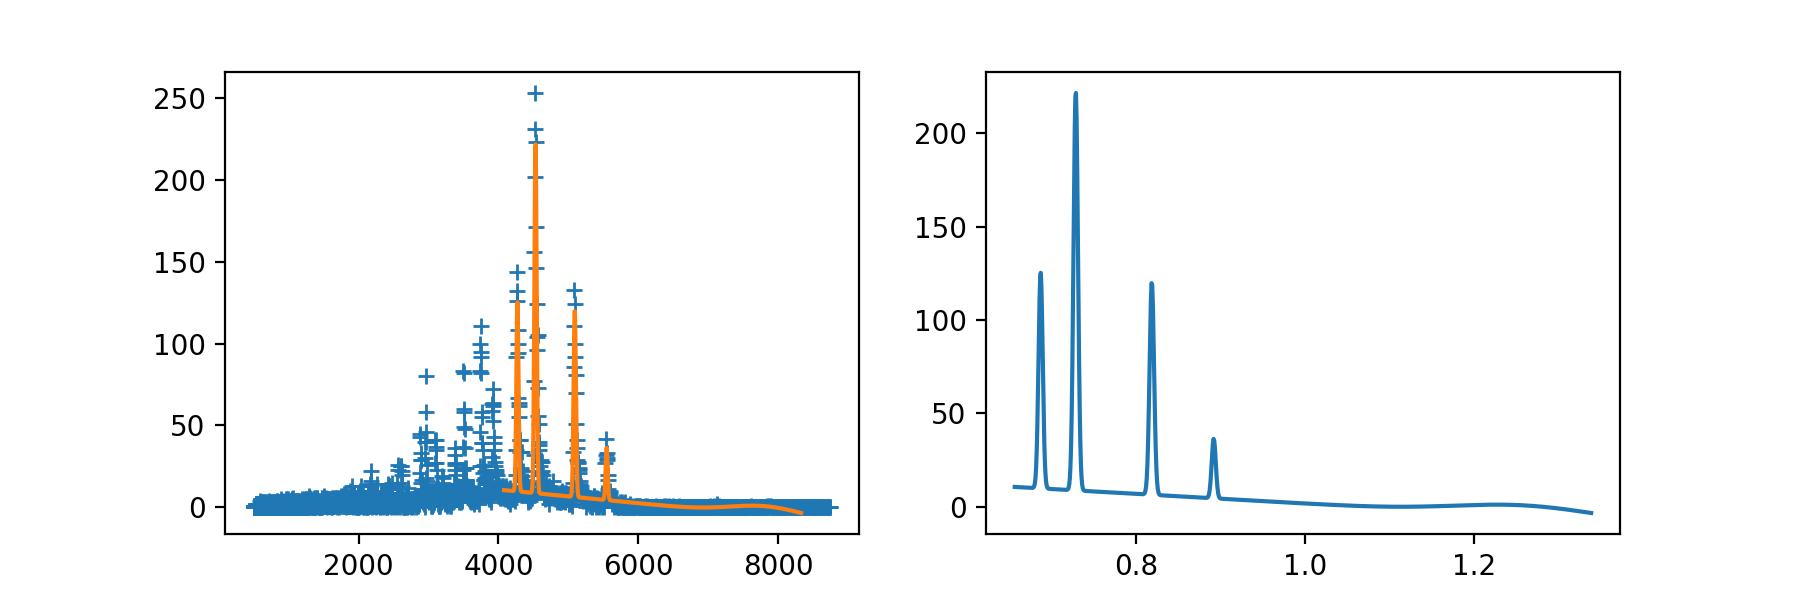

CPU times: user 2.58 s, sys: 9.49 s, total: 12.1 s
Wall time: 452 ms


In [19]:
%%time
fitres = gpd.fitOnePixel(120+7*128)
print fitres.chisq
print fitres.difc, fitres.nominal_difc, fitres.t0
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(fitres.plotdata.x,fitres.plotdata.y, '+')
plt.plot(fitres.plotdata.fitx, fitres.plotdata.fity)
plt.subplot(1,2,2)
plt.plot(fitres.plotdata.d, fitres.plotdata.fity)

2.74147261567
6251.44577772 6235.54882219 7.91944125375


<IPython.core.display.Javascript object>


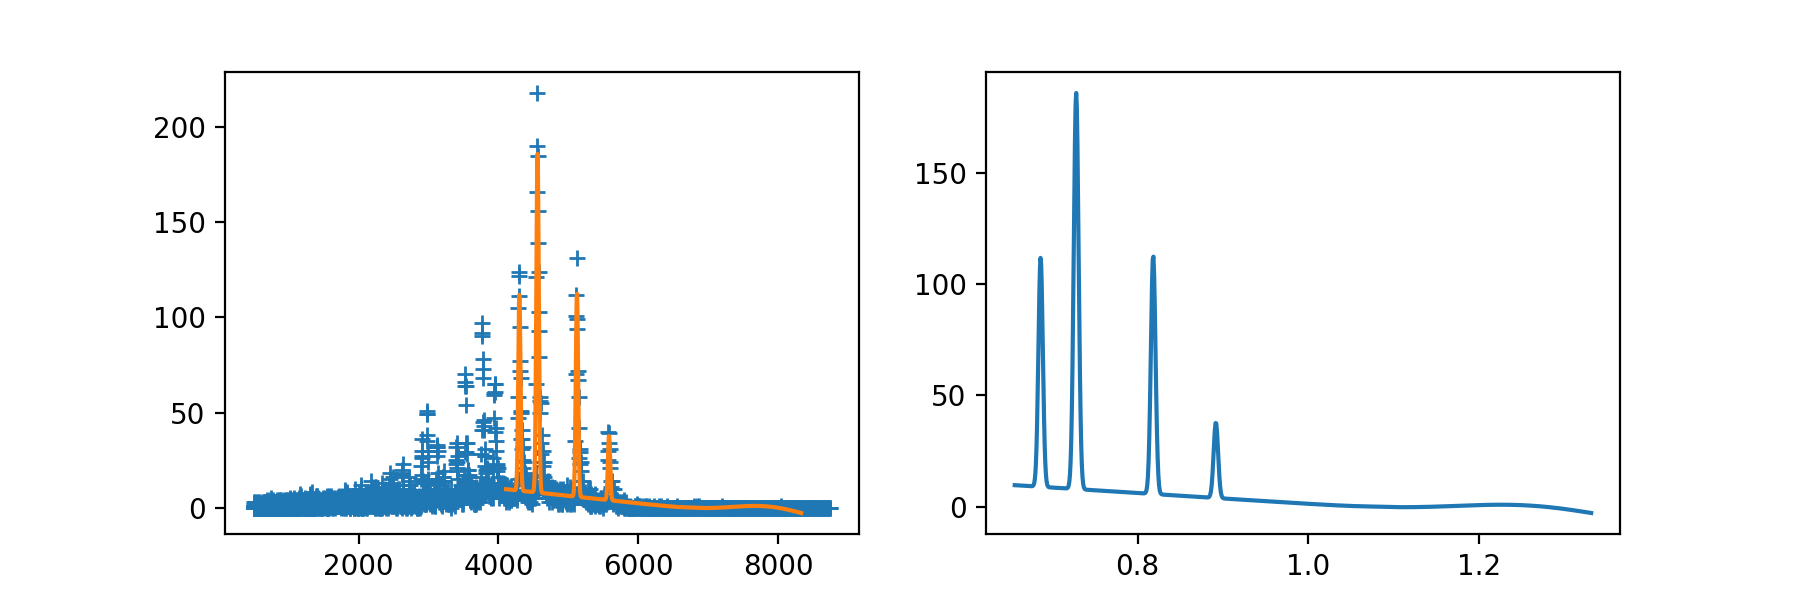

CPU times: user 2.39 s, sys: 8.71 s, total: 11.1 s
Wall time: 413 ms


In [20]:
%%time
fitres = gpd.fitOnePixel(60+7*128)
print fitres.chisq
print fitres.difc, fitres.nominal_difc, fitres.t0
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(fitres.plotdata.x,fitres.plotdata.y, '+')
plt.plot(fitres.plotdata.fitx, fitres.plotdata.fity)
plt.subplot(1,2,2)
plt.plot(fitres.plotdata.d, fitres.plotdata.fity)

In [21]:
%%time
gpd_res = gpd()

- Working on pixel 0
.* Not enough counts: 0
* fit failed: pixel 0
.* Not enough counts: 1
* fit failed: pixel 1
.* Not enough counts: 2
* fit failed: pixel 2
.* Not enough counts: 3
* fit failed: pixel 3
.* Not enough counts: 4
* fit failed: pixel 4
.* Not enough counts: 5
* fit failed: pixel 5
.* Not enough counts: 6
* fit failed: pixel 6
.* Not enough counts: 7
* fit failed: pixel 7
.* Not enough counts: 8
* fit failed: pixel 8
.* Not enough counts: 9
* fit failed: pixel 9
.* Not enough counts: 10
* fit failed: pixel 10
.* Not enough counts: 11
* fit failed: pixel 11
.* Not enough counts: 12
* fit failed: pixel 12
.* Not enough counts: 13
* fit failed: pixel 13
.* Not enough counts: 14
* fit failed: pixel 14
.* Not enough counts: 15
* fit failed: pixel 15
.* Not enough counts: 16
* fit failed: pixel 16
.* Not enough counts: 17
* fit failed: pixel 17
.* Not enough counts: 18
* fit failed: pixel 18
.* Not enough counts: 19
* fit failed: pixel 19
.* Not enough counts: 20
* fit failed: 

In [22]:
diamond_difc, diamond_mask, diamond_signature_d = gpd_res

<IPython.core.display.Javascript object>


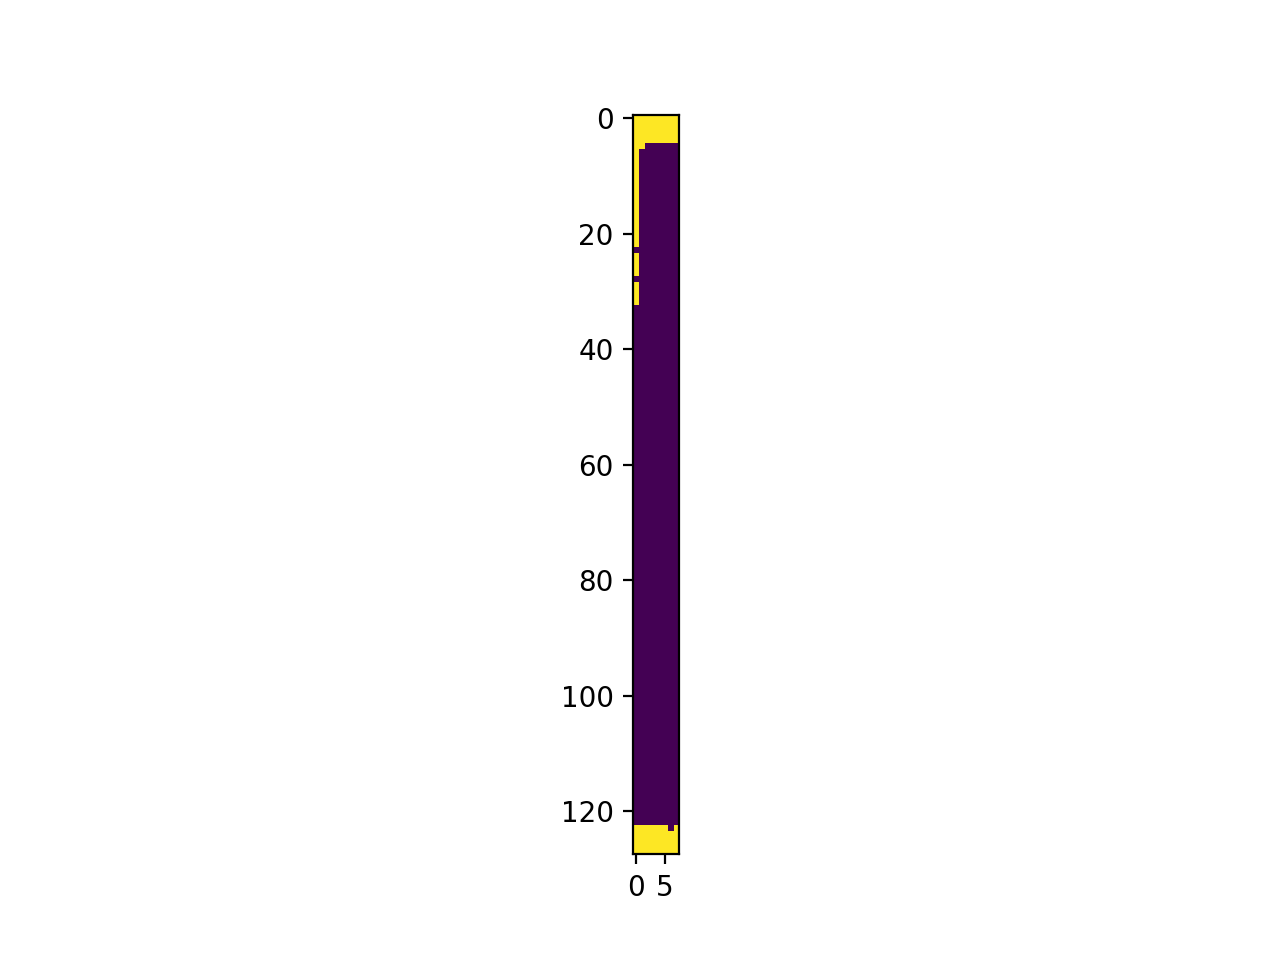

In [23]:
view = diamond_mask.view()
view.shape = 8, 128
plt.figure()
plt.imshow(view.T)

In [24]:
I_tof_dir

'diamond-I_tof'

In [25]:
np.save(os.path.join(I_tof_dir, 'difc-%s.npy' % packname), diamond_difc)
np.save(os.path.join(I_tof_dir, 'mask-%s.npy' % packname), diamond_mask)

In [26]:
# I_tof_dir = 'diamond-I_tof' 
!ls {I_tof_dir}/*-{packname}.npy

diamond-I_tof/difc-B10.npy     diamond-I_tof/mask-B10.npy
diamond-I_tof/I_tof-y-B10.npy


# Align

In [27]:
alignment = align.Align('./diamond-I_tof')
alignment.options['Xposition'] = (-.02, .02)
alignment.options['Yposition'] = (-.02, .02)

In [28]:
alignment.load_L2_from_nxs('./L2table.nxs')

(array([ 3.51550484,  3.50090647,  3.51533628, ...,  3.39422631,
                nan,  3.43802142]),
 array([ True,  True,  True, ...,  True,  True,  True], dtype=bool))

In [29]:
%%time
result = alignment.align(diamond_difc, diamond_mask, packname, ofile=open('new-%s.xml' % packname, 'wt'))

2018-05-13 07:00:10,259 - Align component - INFO - Working on init_IDF.xml/B row/B10/eightpack. Starting position is [3.11639651, -1.100914995, -0.3006238197], Starting rotation is [-84.49, 0.0, 0.0]


- Working on B10
- pack params: [3.11639651, -1.100914995, -0.3006238197, -84.49, 0.0, 0.0]
[[False False False False False False False False]
 [False False False False False False False False]]
center twotheta:  1.13534018576
* initial parameters:  [3.11639651, -1.100914995, -0.3006238197, -84.49, 0.0, 0.0]


/SNS/users/lj7/dv/sns-chops/detcalib/ARCS/lib/align_utils.py:89: UserWarning:

0 + 117760 != 117762



3.15776222546e-05
3.15776436705e-05
3.15776149373e-05
3.15776281585e-05
3.1577622255e-05
2.65024547954e-05
2.65024728156e-05
2.65024486436e-05
2.6502461074e-05
2.65024547957e-05
8.48654391121e-06
8.48654235432e-06
8.48654447947e-06
8.48655045547e-06
8.48654391024e-06
5.43977336681e-06
5.43977049915e-06
5.4397743854e-06
5.43977807112e-06
5.43977336564e-06
2.51102425947e-06
2.51102434251e-06
2.51102426543e-06
2.51102424579e-06


2018-05-13 07:00:21,618 - Align component - INFO - Finished optimizing init_IDF.xml/B row/B10/eightpack. Final position is [3.0990086883525825, -1.0951628131565474, -0.32917449367823537], Final rotation is [-84.4899946461772, 0.0, 0.0]


2.51102425816e-06
- Estimate: (2.7913060058583086, -1.100914995, 1.3959880606427921)
- New: [3.0990086883525825, -1.0951628131565474, -0.32917449367823537, -84.4899946461772, 0.0, 0.0]

  <type name="B10">
    <component type="eightpack">
      <location x="3.09900869" y="-1.09516281" z="-0.32917449">
         <rot axis-z="0" axis-x="0" axis-y="1" val="-84.48999465"/>
      </location>
    </component>
  </type>

CPU times: user 12.8 s, sys: 575 ms, total: 13.3 s
Wall time: 12.7 s


## Summary
* original parameters: 3.11639651, -1.100914995, -0.3006238197, -84.49, 0.0, 0.0
* fitted: 3.0990086883525825, -1.0951628131565474, -0.32917449367823537, -84.4899946461772, 0.0, 0.0

In [30]:
new_params, fit = result

In [32]:
new_params

[3.0990086883525825,
 -1.0951628131565474,
 -0.32917449367823537,
 -84.4899946461772,
 0.0,
 0.0]

In [31]:
fit.options

OrderedDict([('Xposition', (-0.02, 0.02)),
             ('Yposition', (-0.02, 0.02)),
             ('Zposition', (-0.3, 0.3)),
             ('AlphaRotation', (-2.0, 2.0)),
             ('BetaRotation', False),
             ('GammaRotation', False)])